In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Explore Data

In [2]:
# Load Bengaluru House Data
house_data = pd.read_csv('Bengaluru_House_Data.csv')
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Load Weather Training Data
weather_data = pd.read_csv('Weather Training Data.csv')
weather_data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


# Data Cleaning and Preprocessing

#### for Bengaluru house data

In [5]:
# Fill missing values for 'location' and 'size'
house_data['location'].fillna('Unknown', inplace=True)
house_data['size'].fillna('0 BHK', inplace=True)

In [6]:
# Convert 'size' to a numerical column representing the number of bedrooms
house_data['bhk'] = house_data['size'].apply(lambda x: int(x.split(' ')[0]))

In [7]:
# Convert 'total_sqft' to a numeric value
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        else:
            return float(x)
    except:
        return None

In [8]:
house_data['total_sqft'] = house_data['total_sqft'].apply(convert_sqft_to_num)

In [9]:
# Drop rows with missing values
house_data.dropna(inplace=True)

In [10]:
# Display cleaned data
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7482 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7482 non-null   object 
 1   availability  7482 non-null   object 
 2   location      7482 non-null   object 
 3   size          7482 non-null   object 
 4   society       7482 non-null   object 
 5   total_sqft    7482 non-null   float64
 6   bath          7482 non-null   float64
 7   balcony       7482 non-null   float64
 8   price         7482 non-null   float64
 9   bhk           7482 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 643.0+ KB


#### For Weather Data

In [11]:
# Check for missing values
weather_data.isnull().sum()


row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [12]:
# Fill or handle missing values appropriately
# Example: Filling missing numeric values with the median
weather_data.fillna(weather_data.median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13160\3918344490.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_data.fillna(weather_data.median(), inplace=True)


In [13]:
# Display cleaned data
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99516 non-null  float64
 3   MaxTemp        99516 non-null  float64
 4   Rainfall       99516 non-null  float64
 5   Evaporation    99516 non-null  float64
 6   Sunshine       99516 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  99516 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   99516 non-null  float64
 12  WindSpeed3pm   99516 non-null  float64
 13  Humidity9am    99516 non-null  float64
 14  Humidity3pm    99516 non-null  float64
 15  Pressure9am    99516 non-null  float64
 16  Pressure3pm    99516 non-null  float64
 17  Cloud9am       99516 non-null  float64
 18  Cloud3

# Exploratory Data Analysis (EDA)

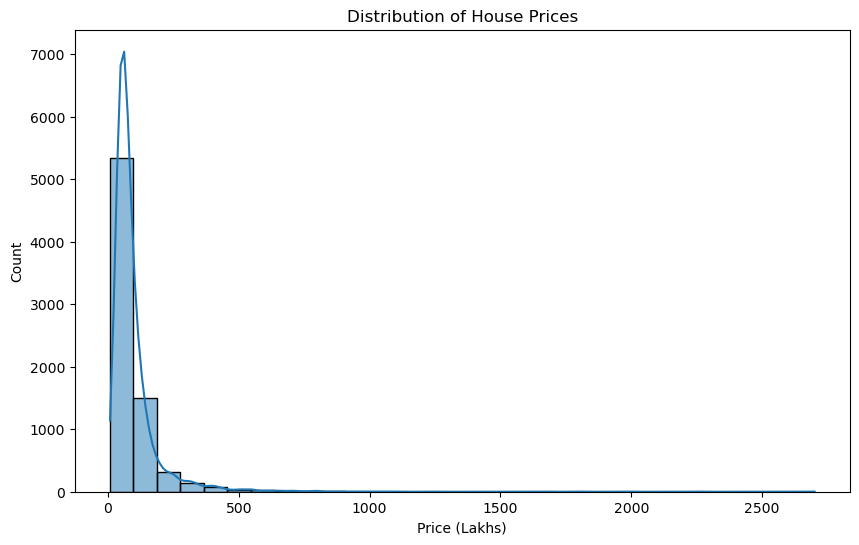

In [14]:
# Plot distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(house_data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (Lakhs)')
plt.show()

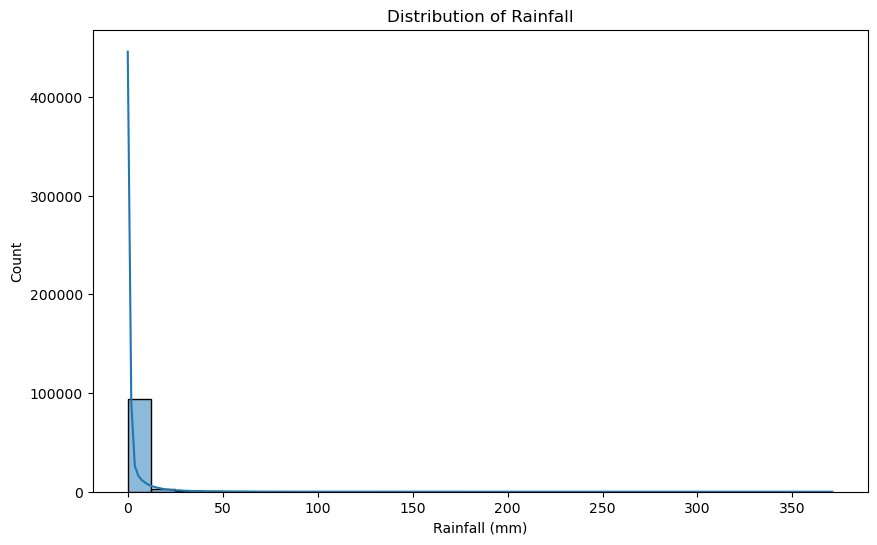

In [15]:
# Plot distribution of rainfall in weather data
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.show()

# Feature Engineering

In [16]:
# For Bengaluru House Data, let's use 'total_sqft' and 'bhk' as features
X = house_data[['total_sqft', 'bhk']]
y = house_data['price']

In [17]:
# For Weather Data, let's assume we're predicting rainfall based on other features
X_weather = weather_data.drop('Rainfall', axis=1)
y_weather = weather_data['Rainfall']

# Model Building and Evaluation

### For House price Prediction

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4336.582023665165
R2 Score: 0.597738993417148


### For Rainfall Prediction

In [23]:
# Split the data into training and testing sets
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

In [24]:
# Train a Linear Regression model
# weather_model = LinearRegression()
# weather_model.fit(X_train_weather, y_train_weather)

ValueError: could not convert string to float: 'Row56426'

In [26]:
# Predict on the test set
# y_pred_weather = weather_model.predict(X_test_weather)

In [ ]:
# Evaluate the model
# print("Mean Squared Error (Weather):", mean_squared_error(y_test_weather, y_pred_weather))
# print("R2 Score (Weather):", r2_score(y_test_weather, y_pred_weather))

## Machine Learning Algorithms to Use:
Linear Regression

Decision Tree Regressor

Random Forest Regressor

Support Vector Regressor (SVR)

Gradient Boosting Regressor

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Data Preparation

In [28]:
# Features and target variable for House Data
X_house = house_data[['total_sqft', 'bhk']]
y_house = house_data['price']

# Features and target variable for Weather Data
X_weather = weather_data.drop('Rainfall', axis=1)
y_weather = weather_data['Rainfall']

# Split the data into training and testing sets for House Data
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Weather Data
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

In [29]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [30]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [31]:
# Evaluate models for Bengaluru House Data
house_results = {}
for model_name, model in models.items():
    mse, r2 = train_and_evaluate_model(model, X_train_house, y_train_house, X_test_house, y_test_house)
    house_results[model_name] = {'MSE': mse, 'R2': r2}


In [32]:
# Evaluate models for Weather Data
# weather_results = {}
# for model_name, model in models.items():
#     mse, r2 = train_and_evaluate_model(model, X_train_weather, y_train_weather, X_test_weather, y_test_weather)
#     weather_results[model_name] = {'MSE': mse, 'R2': r2}


ValueError: could not convert string to float: 'Row56426'

In [33]:
# Display results
print("House Data Results:")
print(pd.DataFrame(house_results).T)

House Data Results:
                                  MSE        R2
Linear Regression         4336.582024  0.597739
Decision Tree             4263.420319  0.604525
Random Forest             3533.683900  0.672216
Support Vector Regressor  5585.420024  0.481897
Gradient Boosting         3484.318700  0.676795


In [34]:
print("\nWeather Data Results:")
print(pd.DataFrame(weather_results).T)


Weather Data Results:
Empty DataFrame
Columns: []
Index: []


#### The model with the lowest MSE and highest R² score will be considered the best-performing model for each dataset.
#### so Gradient Boosting works best for Bengaluru House Price Prediction.